<a href="https://colab.research.google.com/github/JoelForson/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/notes/Class_4_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np

#1. SETUP create a random "population (Minnows and Whales)
#generate 1000 random numbers between $0 and $20
np.random.seed(5200)
population_data = np.random.normal(loc=10, scale=2, size=1000)
population =  pd.DataFrame(population_data, columns=['user_spending'])
#2 DROP SAMPLE: Take random sample of 10 users from the population
sample = population.sample(n=100)
sample
#Calculate Metrics (Mean and Median)
mean_1 = sample['user_spending'].mean()
print(mean_1)
median_1 = sample['user_spending'].median()
print(median_1)

9.791692704178915
9.963329354251524


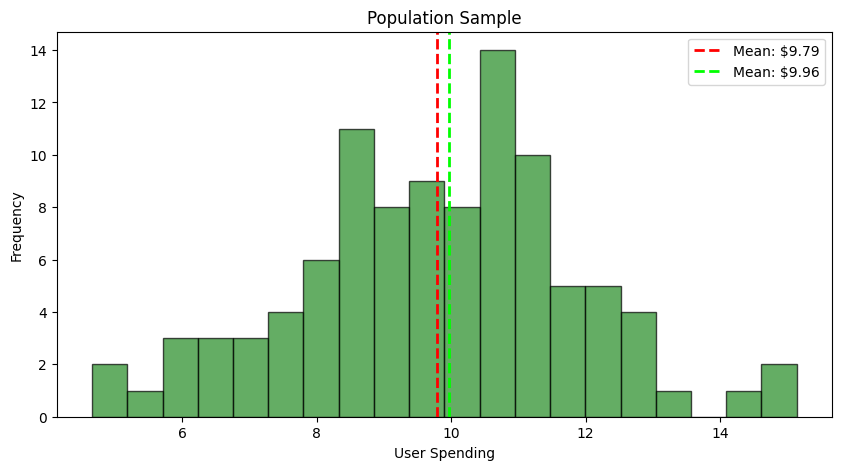

In [48]:
# 2. PLOT 1 : Normal Distribution of Minnows

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(sample['user_spending'], bins= 20, color = 'forestgreen', alpha = 0.7, edgecolor='black')
plt.axvline(mean_1, color='red', linestyle='dashed', linewidth=2, label= f'Mean: ${mean_1:.2f}')
plt.axvline(median_1, color='lime', linestyle='dashed', linewidth=2, label= f'Mean: ${median_1:.2f}')
plt.legend()
plt.title("Population Sample")
plt.xlabel("User Spending")
plt.ylabel("Frequency")
plt.show()

In [51]:
# 3. Introduce Outlier

# Add one user who spends $50,000
whale_row = pd.DataFrame({'user_spending': [50000]})
sample_with_whale = pd.concat([sample, whale_row], ignore_index=True)
sample_with_whale
#calculate metrics(with_whale
mean_2 = sample_with_whale['user_spending'].mean()
median_2 = sample_with_whale['user_spending'].median()

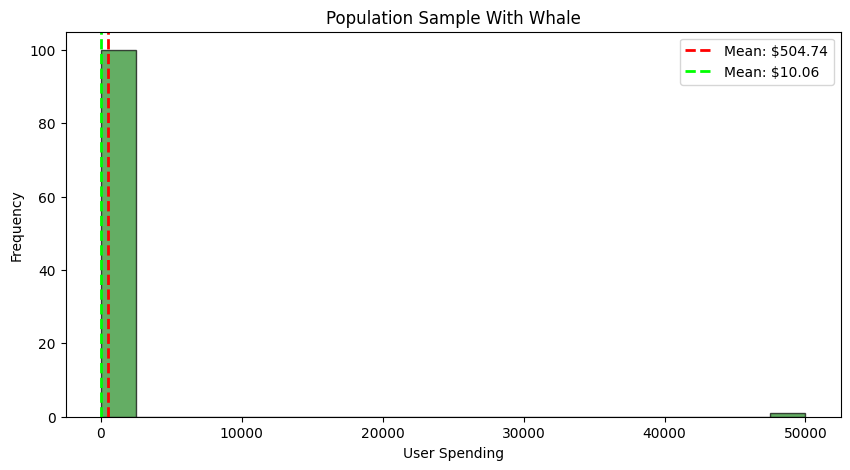

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(sample_with_whale['user_spending'], bins= 20, color = 'forestgreen', alpha = 0.7, edgecolor='black')
plt.axvline(mean_2, color='red', linestyle='dashed', linewidth=2, label= f'Mean: ${mean_2:.2f}')
plt.axvline(median_2, color='lime', linestyle='dashed', linewidth=2, label= f'Mean: ${median_2:.2f}')
plt.legend()
plt.title("Population Sample With Whale")
plt.xlabel("User Spending")
plt.ylabel("Frequency")
plt.show()

In [57]:
# How to fix it then?
# Method 1: The Statistical Way (IQR)
#1. Calculate Q1(25th percentile) and Q3(75th percentile)
Q1 = sample_with_whale['user_spending'].quantile(0.25)
Q3 = sample_with_whale['user_spending'].quantile(0.75)
IQR = Q3 - Q1
#2.  Define the "Fences"(Standard is 1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound
#3. Creata a clean DataFrame of whats only INSIDE the fences
clean_data = sample_with_whale[(sample_with_whale['user_spending'] >= lower_bound)
& (sample_with_whale['user_spending'] <= upper_bound)]
clean_data

,user_spending
0,11.346899
1,8.433480
2,8.610514
3,11.523939
4,9.593844
...,...
95,8.901492
96,8.296002
97,9.618742
98,12.531132


In [58]:
# 3. Use Cleaned data

#calculate metrics(with_whale
mean_3= clean_data['user_spending'].mean()
median_3 = clean_data['user_spending'].median()

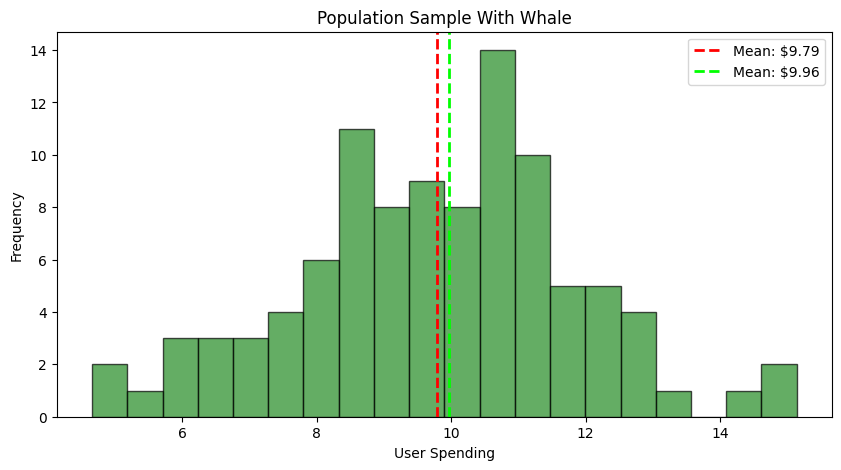

In [60]:
plt.figure(figsize=(10,5))
plt.hist(clean_data['user_spending'], bins= 20, color = 'forestgreen', alpha = 0.7, edgecolor='black')
plt.axvline(mean_3, color='red', linestyle='dashed', linewidth=2, label= f'Mean: ${mean_3:.2f}')
plt.axvline(median_3, color='lime', linestyle='dashed', linewidth=2, label= f'Mean: ${median_3:.2f}')
plt.legend()
plt.title("Population Sample With Whale")
plt.xlabel("User Spending")
plt.ylabel("Frequency")
plt.show()

In [62]:
# Calculating Functions manually
## variance
def manual_std_dev(data):
  """
  Std Dev Squared the error so outliers explode the metric
  Formula: sqrt( sum (x-mean)^2 ) / (n-1) )
  """
  mean = data.mean()
  sqrt_diffs = (data - mean) ** 2
  variance = sqrt_diffs.sum() / (len(data)-1)
  return np.sqrt(variance)

In [63]:
manual_std_dev(sample_with_whale)

,0
user_spending,4974.212075


In [66]:
def manual_mad(data):
    """
    MAD uses absolute difference from the median
    Formula: median(|x - median|)
    """
    median = data.median()
    abs_diffs = np.abs(data - median)
    return abs_diffs.median()


In [67]:
manual_mad(sample_with_whale)

,0
user_spending,1.313608
